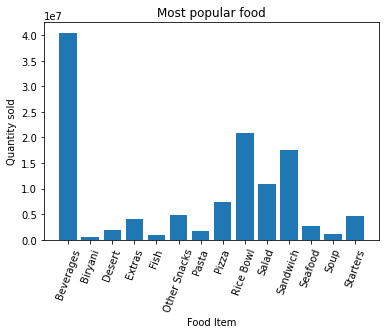

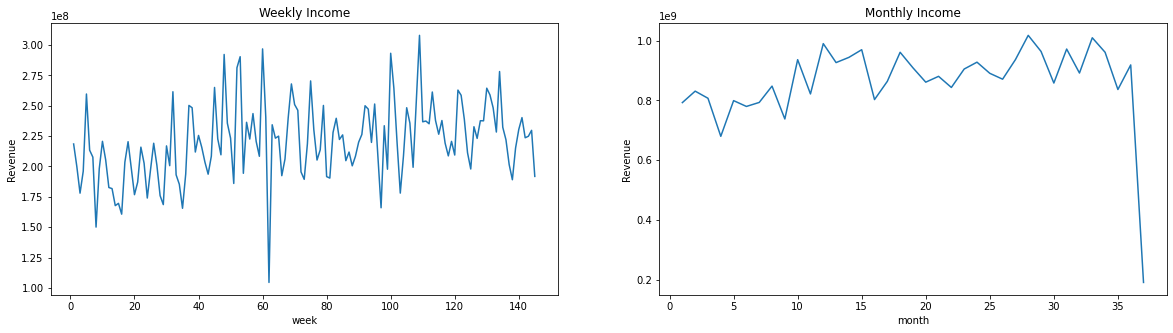

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df_meal = pd.read_csv('meal_info.csv')



df_meal.head()

df_center = pd.read_csv('fulfilment_center_info.csv')


df_center.head()

df_food = pd.read_csv('train.csv')


df_food.head()

df = pd.merge(df_center, df_food, on = 'center_id')
df = pd.merge(df, df_meal, on = 'meal_id')


table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)

# It is creating a table of category as rows in which each category value is the sum of all the num_orders value corresponding to that category



#bar graph
plt.bar(table.index.to_list(), table.num_orders.to_list())
# table.plot(kind = 'bar')


#xticks 
plt.xticks(rotation=70) 


# Rotates the category names in the graph

#x-axis labels 
plt.xlabel('Food Item')

#y-axis labels 
plt.ylabel('Quantity sold')

#plot title 
plt.title('Most popular food')

#save plot 
plt.savefig("Graph_1.png")

#display 
plt.show()



df['revenue'] = df['checkout_price'] * df['num_orders']
df['month'] = (df['week'] + 3)//4

#list to store month-wise revenue 
a = pd.pivot_table(data = df, values = 'revenue', index = 'month', aggfunc=np.sum)
month= a.index.to_list()
month_order= a.revenue.to_list()

   
#list to store week-wise revenue 
b = pd.pivot_table(data = df, values = 'revenue', index = 'week', aggfunc=np.sum)
week= b.index.to_list()
week_order= b.revenue.to_list()
fig, axes  = plt.subplots(1, 2, figsize = (20,5))
axes[0].plot(week, week_order)
axes[0].set_xlabel('week')
axes[0].set_ylabel('Revenue')
axes[0].set_title('Weekly Income')


axes[1].plot(month, month_order)
axes[1].set_xlabel('month')
axes[1].set_ylabel('Revenue')
axes[1].set_title('Monthly Income')
# plt.tight_layout(pad = 3.0)
plt.show()